In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress import master_bar, progress_bar
%matplotlib inline

In [2]:
ls

createCsv.py      index.ipynb       nikkei_index.csv


In [3]:
df = pd.read_csv('nikkei_index.csv')

In [4]:
df.head()

,date,opening,high,low,ending
0,2007-01-04 00:00:00,17322.50,17379.46,17315.75,17353.66
1,2007-01-05 00:00:00,17315.53,17327.13,17011.09,17091.58
2,2007-01-09 00:00:00,17018.89,17261.02,16983.97,17237.76
3,2007-01-10 00:00:00,17192.41,17199.41,16847.57,16942.40
4,2007-01-11 00:00:00,16958.57,17057.44,16758.46,16838.16


In [5]:
len(df)

2620

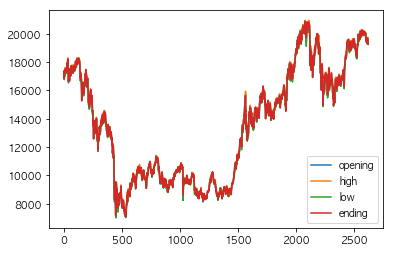

In [6]:
df.plot()

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
X = pd.DataFrame(df['date'])
y = df['ending']

In [9]:
X_train = X[:2600]
y_train = y[:2600]
X_test = X[2600:].reset_index(drop=True)
y_test = y[2600:].reset_index(drop=True)

In [10]:
X_train.head()

,date
0,2007-01-04
1,2007-01-05
2,2007-01-09
3,2007-01-10
4,2007-01-11


In [11]:
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train['dow'] = X_train['date'].dt.dayofweek
X_train.drop(['date'], axis=1, inplace=True)

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test['dow'] = X_test['date'].dt.dayofweek
X_test.drop(['date'], axis=1, inplace=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [12]:
X_valid = X_train[2580:].reset_index(drop=True)
y_valid = y_train[2580:].reset_index(drop=True)
X_train2 = X_train[:2580]
y_train2 = y_train[:2580]

In [13]:
X_train.head()

,year,month,day,dow
0,2007,1,4,3
1,2007,1,5,4
2,2007,1,9,1
3,2007,1,10,2
4,2007,1,11,3


In [14]:
y_valid

0     20099.81
1     20118.86
2     19999.91
3     20020.86
4     20144.59
5     20099.75
6     19975.67
7     19955.20
8     20050.16
9     20079.64
10    19959.84
11    19925.18
12    19985.79
13    20080.04
14    20029.26
15    19952.33
16    20055.89
17    19996.01
18    19738.71
19    19729.74
Name: ending, dtype: float64

In [15]:
X_valid.head()

,year,month,day,dow
0,2017,7,13,3
1,2017,7,14,4
2,2017,7,18,1
3,2017,7,19,2
4,2017,7,20,3


In [20]:
import lightgbm as lgb

lgbm_params = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'boosting_type' : 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
}

def lgbm_train(X_train_df, X_valid_df, y_train_df, y_valid_df, lgbm_params):
    lgb_train = lgb.Dataset(X_train_df, y_train_df)
    lgb_eval = lgb.Dataset(X_valid_df, y_valid_df, reference=lgb_train)

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)
    
    return model

In [21]:
model = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)

[1]	valid_0's rmse: 5989.74
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5611.61
[3]	valid_0's rmse: 5221.34
[4]	valid_0's rmse: 4920.06
[5]	valid_0's rmse: 4485.76
[6]	valid_0's rmse: 4201.29
[7]	valid_0's rmse: 3992.28
[8]	valid_0's rmse: 3650.81
[9]	valid_0's rmse: 3343.51
[10]	valid_0's rmse: 3154.37
[11]	valid_0's rmse: 2896.76
[12]	valid_0's rmse: 2664.93
[13]	valid_0's rmse: 2456.32
[14]	valid_0's rmse: 2330.48
[15]	valid_0's rmse: 2155.36
[16]	valid_0's rmse: 1997.78
[17]	valid_0's rmse: 1911.75
[18]	valid_0's rmse: 1778.58
[19]	valid_0's rmse: 1658.76
[20]	valid_0's rmse: 1550.95
[21]	valid_0's rmse: 1453.95
[22]	valid_0's rmse: 1403.61
[23]	valid_0's rmse: 1321.39
[24]	valid_0's rmse: 1293.01
[25]	valid_0's rmse: 1272.56
[26]	valid_0's rmse: 1235.31
[27]	valid_0's rmse: 1169.99
[28]	valid_0's rmse: 1061.95
[29]	valid_0's rmse: 1049.92
[30]	valid_0's rmse: 1024.64
[31]	valid_0's rmse: 973.988
[32]	valid_0's rmse: 928.425
[33]	valid_0's rmse

In [30]:
from sklearn.metrics import mean_absolute_error
import numpy as np
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
np.sqrt(mean_absolute_error(y_test, y_pred))

19.918868959771334

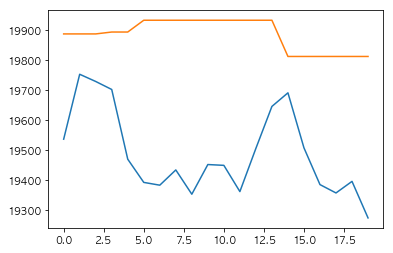

In [27]:
plt.plot(y_test)
plt.plot(y_pred)